**M6: Homework **
(by Justin Jose, Pei Shen )
## Instructions
In this homework, you will use a lending dataset to find the best model to predict who should be given a loan, i.e., determine who will repay in full (or some other criteria you may choose for a good loan). This classification problem assigns a "1" to good loans and "0" to bad loans. The idea is to build a model that will decide on whether to make the loan or not, so you cannot use information that will arrive after the loan is made.

You will need to decide on the definition of "1” and "0" based on the "loan_status" variable in the dataset. Look carefully at the categories and decide which ones you wish to use as 1s and which ones are 0s. This may result in your eliminating rows in your final dataset if you decide not to use all the categories (the ones with very few loans may not be worth retaining). 

Carefully design your feature set. You do not need to use all the variables (some may not be useful, such as “id”, “member_id”, “emp_title”). Why might you not need some of these variables/features? They are categorical and will need to be handled carefully. You can normalize and rebalance your data. Intermediate unsupervised learning techniques may or may not help.

There is missing data. Make a decision on how you will handle those cases. Try to drop columns with very few values. 

Keep 30% of the data for testing, 70% for training.

You must only use features (variables/columns) in the dataset that are available at the time of making the loan, so you need to use your understanding of finance to determine which those features are. This will simplify your dataset, of course. 

Then use any, some, or all of the classifiers you have learned to construct a good ML model to get as high prediction performance as you can, in terms of accuracy and AUC. You may even ensemble the models.

Your grade will be based on relative accuracy/AUC versus your peers, so this will be like a competition. Since you have now learned a range of classifiers and other techniques, every team will have a very different solution, which will be interesting. But it will also give you a feel of a real-world ML situation in which you work to find better models.

In [ ]:
%pylab inline
import os
import pandas as pd
#Map to Google Drive
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks")

# Read in the three CSV files into separate dataframes
loan = pd.read_csv('loan.csv')
loan

Populating the interactive namespace from numpy and matplotlib
Mounted at /content/drive


<ipython-input-2-71f73b2b5163>:11: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [ ]:
#loan.dropna(axis =1)

In [ ]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

'Fully Paid', - 1
'Charged Off', - 0
'Current', - 1
'Default', - 0
'Late (31-120 days)', - 0
'In Grace Period', - 0
'Late (16-30 days)', - 1
'Does not meet the credit policy. Status:Fully Paid', - 1
'Does not meet the credit policy. Status:Charged Off', -0
'Issued' - 0

In [ ]:

total_missing = loan.isnull().sum().sum()
total_cells = loan.size

percent_missing = (total_missing / total_cells) * 100
print(f"The percentage of missing values in the dataframe is: {percent_missing:.2f}%")

The percentage of missing values in the dataframe is: 27.41%


In [ ]:
loan.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

#### **Features with Impact on Loan Status: Shortlisted Variables**

Below are the selected features based on the their financial relevance for a laon account. We believe this feature set brings out the best representation to determine Good and Bad loans.

* loan_amnt: The amount of the loan requested by the borrower.
term: The duration of the loan, typically expressed in months.
* int_rate: The interest rate assigned to the loan.
installment: The monthly payment amount.
* grade: The loan grade assigned by the lending institution based on the borrower's creditworthiness.
* emp_length: The length of employment of the borrower.
* home_ownership: The type of home ownership of the borrower.
* annual_inc: The annual income of the borrower.
* verification_status: Indicates whether the borrower's income has been verified by the lending institution.
* dti: The debt-to-income ratio of the borrower.
delinq_2yrs: The number of delinquencies on the borrower's credit report in the past two years.
* open_acc: The number of open credit lines in the borrower's credit profile.
* pub_rec: The number of derogatory public records on the borrower's credit report.
* revol_bal: The total revolving balance (credit card debt) of the borrower.
* total_acc: The total number of credit lines in the borrower's credit profile.
* initial_list_status: The initial listing status of the loan.
* total_pymnt: The total payment received so far for the loan.
* last_pymnt_d: The date of the borrower's last payment.
* collections_12_mths_ex_med: The number of collections in the borrower's credit profile excluding medical collections.
* inq_last_12m: The number of credit inquiries in the last 12 months.






In [ ]:
loan_selected = loan[['loan_amnt','int_rate','grade','emp_length','home_ownership','annual_inc','verification_status','dti','open_acc','pub_rec','revol_bal','total_acc','initial_list_status','total_pymnt','last_pymnt_d','collections_12_mths_ex_med','inq_last_12m','loan_status']]

In [ ]:
loan_selected.head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,total_pymnt,last_pymnt_d,collections_12_mths_ex_med,inq_last_12m,loan_status
0,5000.0,10.65,B,10+ years,RENT,24000.0,Verified,27.65,3.0,0.0,13648.0,9.0,f,5861.071414,Jan-2015,0.0,NaN,Fully Paid
1,2500.0,15.27,C,< 1 year,RENT,30000.0,Source Verified,1.00,3.0,0.0,1687.0,4.0,f,1008.710000,Apr-2013,0.0,NaN,Charged Off
2,2400.0,15.96,C,10+ years,RENT,12252.0,Not Verified,8.72,2.0,0.0,2956.0,10.0,f,3003.653644,Jun-2014,0.0,NaN,Fully Paid
3,10000.0,13.49,C,10+ years,RENT,49200.0,Source Verified,20.00,10.0,0.0,5598.0,37.0,f,12226.302212,Jan-2015,0.0,NaN,Fully Paid
4,3000.0,12.69,B,1 year,RENT,80000.0,Source Verified,17.94,15.0,0.0,27783.0,38.0,f,3242.170000,Jan-2016,0.0,NaN,Current


In [ ]:
total_records = len(loan_selected)

In [ ]:
categories = loan_selected['loan_status'].unique()

In [ ]:
for category in categories:
  category_record = len(loan_selected[loan_selected['loan_status']==category])
  print(f"Category '{category}': {category_record} out of {total_records} records")

Category 'Fully Paid': 207723 out of 887379 records
Category 'Charged Off': 45248 out of 887379 records
Category 'Current': 601779 out of 887379 records
Category 'Default': 1219 out of 887379 records
Category 'Late (31-120 days)': 11591 out of 887379 records
Category 'In Grace Period': 6253 out of 887379 records
Category 'Late (16-30 days)': 2357 out of 887379 records
Category 'Does not meet the credit policy. Status:Fully Paid': 1988 out of 887379 records
Category 'Does not meet the credit policy. Status:Charged Off': 761 out of 887379 records
Category 'Issued': 8460 out of 887379 records


In [ ]:
loan_selected = loan_selected.drop(loan_selected[loan_selected['loan_status']=='Does not meet the credit policy. Status:Charged Off'].index)
loan_selected = loan_selected.reset_index(drop=True)

In [ ]:
for category in categories:
  category_record = len(loan_selected[loan_selected['loan_status']==category])
  print(f"Category '{category}': {category_record} out of {total_records} records")

Category 'Fully Paid': 207723 out of 887379 records
Category 'Charged Off': 45248 out of 887379 records
Category 'Current': 601779 out of 887379 records
Category 'Default': 1219 out of 887379 records
Category 'Late (31-120 days)': 11591 out of 887379 records
Category 'In Grace Period': 6253 out of 887379 records
Category 'Late (16-30 days)': 2357 out of 887379 records
Category 'Does not meet the credit policy. Status:Fully Paid': 1988 out of 887379 records
Category 'Does not meet the credit policy. Status:Charged Off': 0 out of 887379 records
Category 'Issued': 8460 out of 887379 records


In [ ]:
print(loan_selected['loan_status'].value_counts())

Current                                               601779
Fully Paid                                            207723
Charged Off                                            45248
Late (31-120 days)                                     11591
Issued                                                  8460
In Grace Period                                         6253
Late (16-30 days)                                       2357
Does not meet the credit policy. Status:Fully Paid      1988
Default                                                 1219
Name: loan_status, dtype: int64


'Fully Paid', - 1 'Charged Off', - 0 'Current', - 1 'Default', - 0 'Late (31-120 days)', - 0 'In Grace Period', - 0 'Late (16-30 days)', - 1 'Does not meet the credit policy. Status:Fully Paid', - 1 'Does not meet the credit policy. Status:Charged Off', -0 'Issued' - 1

In [ ]:
loan_selected = loan_selected.copy()
loan_selected['loan_creditworthiness'] = loan_selected['loan_status'].replace({
    'Fully Paid': 1,
    'Charged Off': 0,
    'Current': 1,
    'Default': 0,
    'Late (31-120 days)': 0,
    'In Grace Period': 1,
    'Late (16-30 days)': 1,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    
    'Issued': 1
})

In [ ]:
loan_selected.head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,total_pymnt,last_pymnt_d,collections_12_mths_ex_med,inq_last_12m,loan_status,loan_creditworthiness
0,5000.0,10.65,B,10+ years,RENT,24000.0,Verified,27.65,3.0,0.0,13648.0,9.0,f,5861.071414,Jan-2015,0.0,NaN,Fully Paid,1
1,2500.0,15.27,C,< 1 year,RENT,30000.0,Source Verified,1.00,3.0,0.0,1687.0,4.0,f,1008.710000,Apr-2013,0.0,NaN,Charged Off,0
2,2400.0,15.96,C,10+ years,RENT,12252.0,Not Verified,8.72,2.0,0.0,2956.0,10.0,f,3003.653644,Jun-2014,0.0,NaN,Fully Paid,1
3,10000.0,13.49,C,10+ years,RENT,49200.0,Source Verified,20.00,10.0,0.0,5598.0,37.0,f,12226.302212,Jan-2015,0.0,NaN,Fully Paid,1
4,3000.0,12.69,B,1 year,RENT,80000.0,Source Verified,17.94,15.0,0.0,27783.0,38.0,f,3242.170000,Jan-2016,0.0,NaN,Current,1


####Removing the column #loan_status to use derived attribute loan_creditworthiness based on good/bad loans(1/0) 


In [ ]:
loan_selected = loan_selected.drop(['loan_status'],axis=1)

In [ ]:

loan_selected.tail()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,total_pymnt,last_pymnt_d,collections_12_mths_ex_med,inq_last_12m,loan_creditworthiness
886613,10000.0,11.99,B,8 years,RENT,31000.0,Verified,28.69,9.0,1.0,14037.0,15.0,f,3971.88,Jan-2016,0.0,NaN,1
886614,24000.0,11.99,B,10+ years,MORTGAGE,79000.0,Verified,3.90,5.0,0.0,8621.0,23.0,f,9532.39,Jan-2016,0.0,NaN,1
886615,13000.0,15.99,D,5 years,RENT,35000.0,Verified,30.90,9.0,1.0,11031.0,22.0,w,3769.74,Jan-2016,0.0,NaN,1
886616,12000.0,19.99,E,1 year,RENT,64400.0,Source Verified,27.19,17.0,0.0,8254.0,20.0,w,3787.67,Jan-2016,1.0,NaN,1
886617,20000.0,11.99,B,10+ years,RENT,100000.0,Verified,10.83,8.0,1.0,33266.0,10.0,f,7943.76,Jan-2016,0.0,NaN,1


#### Convert Categorical variables

##### USING LABEL ENCODING - AS IT COULD HELP PRESERVE ORDERING


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Categories in emp_length
loan_selected['emp_length'].unique()


array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
# Define the desired order of categories
category_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', float('nan')]

# Create a mapping of categories to numerical labels
label_mapping = {category: label for label, category in enumerate(category_order)}

# Apply the mapping to the 'emp_length' column
loan_selected['emp_length_encoded'] = loan_selected['emp_length'].map(label_mapping)

loan_selected = loan_selected.drop(['emp_length'],axis=1)


In [ ]:
# categories in grade
loan_selected['grade'].unique()


array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
# Define the desired order of categories
category_order = ['A', 'B', 'C', 'D', 'E', 'F','G']

# Create a mapping of categories to numerical labels
label_mapping = {category: label for label, category in enumerate(category_order)}

# Apply the mapping to the 'emp_length' column
loan_selected['grade_encoded'] = loan_selected['grade'].map(label_mapping)

loan_selected = loan_selected.drop(['grade'],axis=1)

In [ ]:
loan_selected.head()

,loan_amnt,int_rate,home_ownership,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,total_pymnt,last_pymnt_d,collections_12_mths_ex_med,inq_last_12m,loan_creditworthiness,emp_length_encoded,grade_encoded
0,5000.0,10.65,RENT,24000.0,Verified,27.65,3.0,0.0,13648.0,9.0,f,5861.071414,Jan-2015,0.0,NaN,1,10,1
1,2500.0,15.27,RENT,30000.0,Source Verified,1.00,3.0,0.0,1687.0,4.0,f,1008.710000,Apr-2013,0.0,NaN,0,0,2
2,2400.0,15.96,RENT,12252.0,Not Verified,8.72,2.0,0.0,2956.0,10.0,f,3003.653644,Jun-2014,0.0,NaN,1,10,2
3,10000.0,13.49,RENT,49200.0,Source Verified,20.00,10.0,0.0,5598.0,37.0,f,12226.302212,Jan-2015,0.0,NaN,1,10,2
4,3000.0,12.69,RENT,80000.0,Source Verified,17.94,15.0,0.0,27783.0,38.0,f,3242.170000,Jan-2016,0.0,NaN,1,1,1


#### ONEHOT ENCODING

In [ ]:
loan_selected['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
loan_selected['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [ ]:
loan_selected['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

* 'f': This value indicates that the loan listing was in a "fractional" status. 

* 'w': This value typically represents a "whole" loan listing status. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:

# Select the columns to be one-hot encoded
columns_to_encode = ['home_ownership', 'verification_status', 'initial_list_status']

# Create an instance of the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the selected columns using one-hot encoding
onehot_encoded = onehot_encoder.fit_transform(loan_selected[columns_to_encode])

# Convert one-hot encoded features to a DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(columns_to_encode))

# Concatenate the original DataFrame and the one-hot encoded DataFrame
df_encoded = pd.concat([loan_selected, onehot_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_encoded = df_encoded.drop(['home_ownership', 'verification_status', 'initial_list_status'], axis=1)

##### NUMERIC CONVERSION - DOESN"T PRESERVE THE EXACT VALUE BUT STILL MANAGES TO OBTAIN THE ORDER

In [ ]:
df_encoded['last_pymnt_d'].unique()

array(['Jan-2015', 'Apr-2013', 'Jun-2014', 'Jan-2016', 'Apr-2012',
       'Nov-2012', 'Jun-2013', 'Sep-2013', 'Jul-2012', 'Oct-2013',
       'May-2013', 'Feb-2015', 'Aug-2015', 'Oct-2012', 'Sep-2012', nan,
       'Dec-2012', 'Dec-2014', 'Aug-2013', 'Nov-2013', 'Jan-2014',
       'Apr-2014', 'Aug-2014', 'Oct-2014', 'Aug-2012', 'Jul-2014',
       'Jul-2013', 'Apr-2015', 'Feb-2014', 'Sep-2014', 'Jun-2012',
       'Feb-2013', 'Mar-2013', 'May-2014', 'Mar-2015', 'Jan-2013',
       'Dec-2013', 'Feb-2012', 'Mar-2014', 'Sep-2015', 'Nov-2015',
       'Dec-2015', 'Jan-2012', 'Oct-2015', 'Nov-2014', 'Mar-2012',
       'May-2012', 'Jun-2015', 'May-2015', 'Jul-2015', 'Dec-2011',
       'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011', 'Jul-2011',
       'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011', 'Feb-2011',
       'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010', 'Sep-2010',
       'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010', 'Apr-2010',
       'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009', 'N

In [ ]:
df_encoded['last_pymnt_d'] = pd.to_datetime(df_encoded['last_pymnt_d']).astype(int) // 10**9

* converting to numeric conversion considering it to be reasonable, as feature is just used as one of many features to predict credit_worthiness

In [ ]:
df_encoded['last_pymnt_d'].unique()

array([ 1420070400,  1364774400,  1401580800,  1451606400,  1333238400,
        1351728000,  1370044800,  1377993600,  1341100800,  1380585600,
        1367366400,  1422748800,  1438387200,  1349049600,  1346457600,
       -9223372037,  1354320000,  1417392000,  1375315200,  1383264000,
        1388534400,  1396310400,  1406851200,  1412121600,  1343779200,
        1404172800,  1372636800,  1427846400,  1391212800,  1409529600,
        1338508800,  1359676800,  1362096000,  1398902400,  1425168000,
        1356998400,  1385856000,  1328054400,  1393632000,  1441065600,
        1446336000,  1448928000,  1325376000,  1443657600,  1414800000,
        1330560000,  1335830400,  1433116800,  1430438400,  1435708800,
        1322697600,  1320105600,  1317427200,  1314835200,  1312156800,
        1309478400,  1306886400,  1304208000,  1301616000,  1298937600,
        1296518400,  1293840000,  1291161600,  1288569600,  1285891200,
        1283299200,  1280620800,  1277942400,  1275350400,  1272

In [ ]:
X = df_encoded.drop('loan_creditworthiness', axis =1 )

In [ ]:
y  = df_encoded['loan_creditworthiness']

In [ ]:

# Check for missing values in the specified features/columns
missing_values = df_encoded.isnull().sum()

# Display the count of missing values
print(missing_values)

loan_amnt                                   0
int_rate                                    0
annual_inc                                  4
dti                                         0
open_acc                                   26
pub_rec                                    26
revol_bal                                   0
total_acc                                  26
total_pymnt                                 0
last_pymnt_d                                0
collections_12_mths_ex_med                123
inq_last_12m                           865246
loan_creditworthiness                       0
emp_length_encoded                          0
grade_encoded                               0
home_ownership_ANY                          0
home_ownership_MORTGAGE                     0
home_ownership_NONE                         0
home_ownership_OTHER                        0
home_ownership_OWN                          0
home_ownership_RENT                         0
verification_status_Not Verified  

In [ ]:
df_encoded = df_encoded.drop('inq_last_12m', axis=1)

Dropping inq_last_12m as most of the data is missing

In [ ]:
df_encoded = df_encoded.dropna()

In [ ]:


# Check for missing values in the specified features/columns
missing_values = df_encoded.isnull().sum()

# Display the count of missing values
print(missing_values)

loan_amnt                              0
int_rate                               0
annual_inc                             0
dti                                    0
open_acc                               0
pub_rec                                0
revol_bal                              0
total_acc                              0
total_pymnt                            0
last_pymnt_d                           0
collections_12_mths_ex_med             0
loan_creditworthiness                  0
emp_length_encoded                     0
grade_encoded                          0
home_ownership_ANY                     0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
initial_list_status_f                  0
initial_list_sta

### importing Required libraries

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
df_encoded

,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,last_pymnt_d,...,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w
0,5000.0,10.65,24000.0,27.65,3.0,0.0,13648.0,9.0,5861.071414,1420070400,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,2500.0,15.27,30000.0,1.00,3.0,0.0,1687.0,4.0,1008.710000,1364774400,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2400.0,15.96,12252.0,8.72,2.0,0.0,2956.0,10.0,3003.653644,1401580800,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,10000.0,13.49,49200.0,20.00,10.0,0.0,5598.0,37.0,12226.302212,1420070400,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,3000.0,12.69,80000.0,17.94,15.0,0.0,27783.0,38.0,3242.170000,1451606400,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886613,10000.0,11.99,31000.0,28.69,9.0,1.0,14037.0,15.0,3971.880000,1451606400,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
886614,24000.0,11.99,79000.0,3.90,5.0,0.0,8621.0,23.0,9532.390000,1451606400,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
886615,13000.0,15.99,35000.0,30.90,9.0,1.0,11031.0,22.0,3769.740000,1451606400,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
886616,12000.0,19.99,64400.0,27.19,17.0,0.0,8254.0,20.0,3787.670000,1451606400,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


Split data into train and  test split 

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 42)

#### Model Random Forest Classifier

In [ ]:
# Handle missing values by imputing with the mean value
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Perform cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_imputed, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores: ", cross_val_scores)
print("Average Cross-Validation Score: ", cross_val_scores.mean())

Cross-Validation Scores:  [0.98929322 0.98934962 0.98926091 0.98959928 0.98842305]
Average Cross-Validation Score:  0.989185217210187


As individual cv scores are close to the average score, we can assume that the model is able to generalize the dataset.

In [ ]:
# Fit the Random Forest classifier on the entire training data
rf_classifier.fit(X_imputed, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_imputed)

# Evaluate the predictions (e.g., calculate accuracy)
accuracy = rf_classifier.score(X_test_imputed, y_test)

# Print the accuracy score
print("Accuracy: ", accuracy)

Accuracy:  0.9894468129901574


In [ ]:
# Calculate the AUC score on the test data
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.9221634818328535

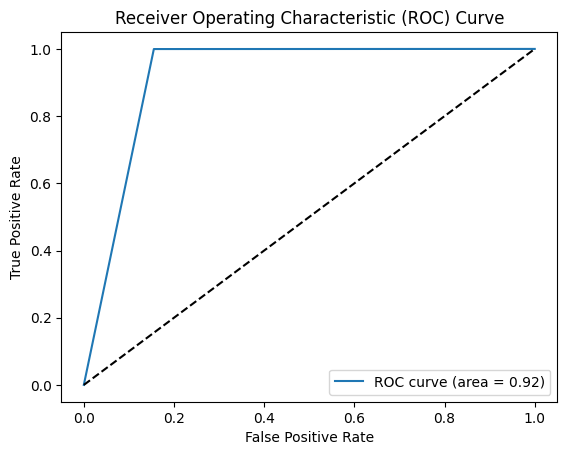

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

####Model K-nearest Neighbour

In [ ]:
# Create a KNN Classifier
knn_classifier = KNeighborsClassifier()

# Perform cross-validation
cross_val_scores = cross_val_score(knn_classifier, X_imputed, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores: ", cross_val_scores)
print("Average Cross-Validation Score: ", cross_val_scores.mean())

Cross-Validation Scores:  [0.97442136 0.97503363 0.97442115 0.97458228 0.97416335]
Average Cross-Validation Score:  0.974524355163312


In [ ]:
# Train the KNN classifier on the training data
knn_classifier.fit(X_imputed, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_imputed)

# Evaluate the predictions (e.g., calculate accuracy)
accuracy = knn_classifier.score(X_test_imputed, y_test)

# Print the accuracy score
print("Accuracy: ", accuracy)


Accuracy:  0.9755287872294031


In [ ]:
# Calculate the AUC score on the test data
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.8258161057661634

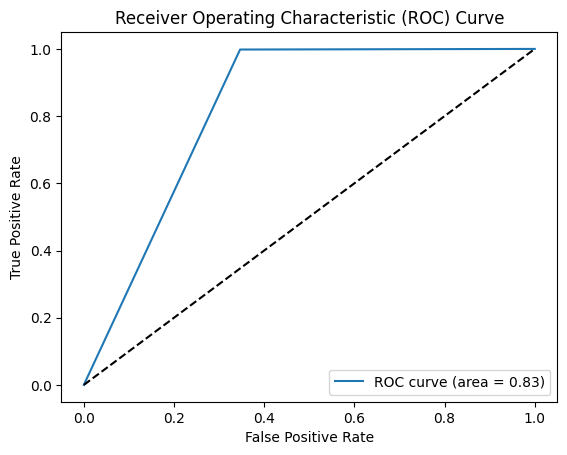

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Summary**

**KNN Classifier**

This shows that the KNN classifier did well, as evidenced by its high accuracy rating(0.9755) on the test data. The cross-validation model's performance appears to be consistent across various subsets of the data, according to the CV score of 0.9745. AUC score of the model is 0.8258, which shows the model is valid. 

**Random Forest**

The Random Forest Classifier, on the other hand, produced results with a better accuracy of 0.9895 and a CV score of 0.9892. AUC score of 0.9231 also determines that the model is performing well. These results imply that the Random Forest Classifier performed more accurately than the KNN classifier. It performed better on the test data, and the CV score shows a high level of generalization and consistency of the model across various subsets of data.

**Conclusion**

Based on the above resutls confirms that Random Forest performs well on complex data due to its ability to handle nonlinear relationships, capture complex patterns, and handle noisy and high-dimensional data effectively. 